In [1]:
import pandas as pd
import seaborn as sns

df = pd.read_csv('EWS.csv')
Y=df.Y
df1 = df.drop(df.columns[0], axis=1)
df1

,Data,XAUBGNL,ECSURPUS,BDIY,CRY,DXY,JPY,GBP,Cl1,VIX,...,LP01TREU,EMUSTRUU,LF94TRUU,MXUS,MXEU,MXJP,MXBR,MXRU,MXIN,MXCN
0,11/01/2000,283.25,0.077,1388.0,157.26,100.56,105.86,1.646,25.77,22.50,...,116.464,230.527,123.762,1416.12,127.75,990.59,856.76,224.33,217.34,34.30
1,18/01/2000,287.65,0.043,1405.0,165.01,101.86,105.47,1.638,28.85,21.50,...,117.267,231.377,123.762,1428.79,129.50,993.98,925.22,234.37,227.08,32.74
2,25/01/2000,287.15,0.135,1368.0,167.24,102.41,106.04,1.650,28.28,23.02,...,117.995,232.390,123.762,1385.93,126.48,974.83,886.93,216.82,233.00,32.46
3,01/02/2000,282.75,0.191,1311.0,166.85,104.92,107.85,1.611,28.22,23.45,...,120.510,231.942,122.328,1385.31,129.19,1007.12,842.60,201.89,237.48,31.29
4,08/02/2000,298.40,0.312,1277.0,165.43,104.22,109.30,1.611,28.02,21.25,...,118.791,237.812,122.328,1411.95,134.67,1034.58,945.15,218.00,258.02,31.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1106,23/03/2021,1727.96,0.340,2271.0,184.50,92.34,108.72,1.380,57.76,20.30,...,427.800,1249.400,389.850,3800.77,140.32,1199.57,1671.73,681.21,1695.96,110.83
1107,30/03/2021,1685.56,0.300,2103.0,184.87,93.30,110.29,1.370,60.55,19.61,...,428.660,1242.260,385.810,3835.96,142.76,1206.29,1635.57,693.38,1690.76,108.80
1108,06/04/2021,1743.28,0.440,2092.0,185.84,92.34,109.88,1.380,59.33,18.12,...,430.660,1250.260,390.680,3955.16,144.13,1194.62,1689.62,673.20,1689.48,111.92
1109,13/04/2021,1742.69,0.470,2140.0,188.14,91.85,109.19,1.370,60.18,16.65,...,430.410,1252.560,390.380,4027.05,144.23,1197.06,1680.82,680.23,1672.46,108.40


<AxesSubplot:>

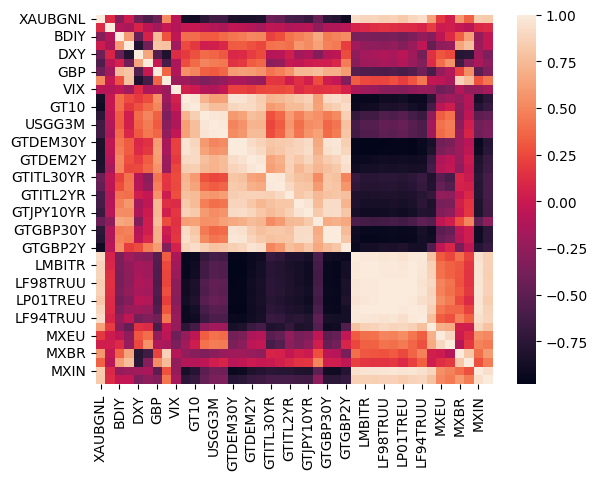

In [2]:
sns.heatmap(df1.corr())

In [3]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


# Drop any non-numeric columns
df2 = df1.select_dtypes(include=['float64', 'int64'])

scaler = StandardScaler()
scaler.fit(df2)
df2=scaler.transform(df2) 

# Perform PCA with two components
pca = PCA(n_components=10)
principal_components = pca.fit_transform(df2)

# Create a new DataFrame for the principal components
principal_df = pd.DataFrame(data = principal_components)

# Print the explained variance ratio
pca.explained_variance_ratio_


array([0.59829188, 0.15584682, 0.11009424, 0.03230885, 0.02886175,
       0.02191405, 0.01049386, 0.00840483, 0.00770165, 0.00548556])

In [6]:
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import numpy as np 
import nbformat

loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
features=df1.columns[1:]
fig = px.scatter(principal_components, x=0, y=1, color=Y)

for i, feature in enumerate(features):
    fig.add_annotation(
        ax=0, ay=0,
        axref="x", ayref="y",
        x=loadings[i, 0],
        y=loadings[i, 1],
        showarrow=True,
        arrowsize=2,
        arrowhead=2,
        xanchor="right",
        yanchor="top"
    )
    fig.add_annotation(
        x=loadings[i, 0],
        y=loadings[i, 1],
        ax=0, ay=0,
        xanchor="center",
        yanchor="bottom",
        text=feature,
        yshift=5,
    )
fig.show()